<a href="https://colab.research.google.com/github/Eunhee-JJ/github-prctice/blob/main/h2o_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install requests
!pip install tabulate
!pip install “colorama>=0.3.8”
!pip install future
# 기존 h2o 삭제
!pip uninstall h2o
# h2o 설치
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

ERROR: Invalid requirement: '“colorama'
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 164.6MB 79kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.4-py2.py3-none-any.whl size=164670979 sha256=1f83e1aa51cf136cbea43ac7d092bd617882aefa565e7309cc1c2d4058fb5e95
  Stored in directory: /root/.cache/pip/wheels/65/f4/0d/c9bb958d70c2e015c968cb91cbd7f1b486933056d422337d75
Successfully built h2o


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import h2o
from h2o.automl import H2OAutoML
%matplotlib inline
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6escgthk
  JVM stdout: /tmp/tmp6escgthk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6escgthk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_56s90n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [5]:
data_df = pd.read_csv('/content/IRIS.csv')
data_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
y = "species"
x = list(data_df.columns)
x.remove(y)

In [9]:
train, valid = train_test_split(data_df, test_size=0.2, shuffle=True)

In [10]:
h2o_train = h2o.H2OFrame(train)
h2o_valid = h2o.H2OFrame(valid)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [12]:
aml = H2OAutoML(max_runtime_secs=30, project_name="iris_cmd")

In [14]:
aml.train(x=x, y=y, training_frame=h2o_train, leaderboard_frame=h2o_valid)

AutoML progress: |█████████████████
07:44:20.830: Skipping training of model GBM_5_AutoML_20210219_074409 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210219_074409.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.


███████████████████████████████████████| 100%


In [16]:
leaderboard = aml.leaderboard
performance = aml.leader.model_performance(h2o_valid)

In [17]:
performance


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.019712327101097993
RMSE: 0.14040059508811917
LogLoss: 0.08836085073479795
Mean Per-Class Error: 0.0
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
0,16.0,0.0,0.0,0.0,0 / 16
1,0.0,8.0,0.0,0.0,0 / 8
2,0.0,0.0,6.0,0.0,0 / 6
3,16.0,8.0,6.0,0.0,0 / 30



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0


In [18]:
leaderboard

model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
DeepLearning_grid__1_AutoML_20210219_074409_model_1,0,0.0883609,0.140401,0.0197123,nan,nan
GBM_3_AutoML_20210219_074409,0.0416667,0.23767,0.235003,0.0552266,nan,nan
XGBoost_grid__1_AutoML_20210219_074409_model_3,0.0416667,0.159456,0.2028,0.0411277,nan,nan
DRF_1_AutoML_20210219_074409,0.0416667,0.0902683,0.17533,0.0307407,nan,nan
XGBoost_grid__1_AutoML_20210219_074409_model_6,0.0416667,0.342854,0.301706,0.0910267,nan,nan
StackedEnsemble_BestOfFamily_AutoML_20210219_074409,0.0416667,0.218435,0.221478,0.0490525,nan,nan
XGBoost_grid__1_AutoML_20210219_074409_model_1,0.0416667,0.136659,0.184885,0.0341823,nan,nan
GBM_grid__1_AutoML_20210219_074409_model_3,0.0416667,0.163285,0.19325,0.0373454,nan,nan
XRT_1_AutoML_20210219_074409,0.0416667,0.129155,0.202477,0.0409969,nan,nan
GBM_2_AutoML_20210219_074409,0.0416667,0.280597,0.259499,0.0673396,nan,nan


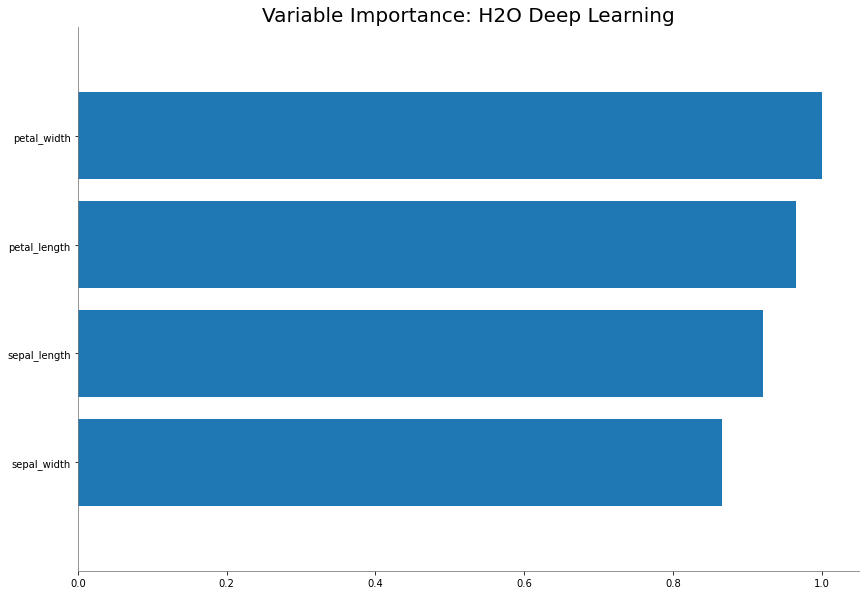

In [20]:
aml.leader.varimp_plot()

In [22]:
get_aml = h2o.automl.get_automl("iris_cmd")

In [24]:
label_predicted = get_aml.predict(h2o_valid)
print(label_predicted['predict'])
print(h2o_valid['species'])

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict
Iris-setosa
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-setosa
Iris-setosa
Iris-setosa
Iris-virginica
Iris-setosa
Iris-setosa


species
Iris-setosa
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-setosa
Iris-setosa
Iris-setosa
Iris-virginica
Iris-setosa
Iris-setosa
